## Customer Support Q&A Chatbot

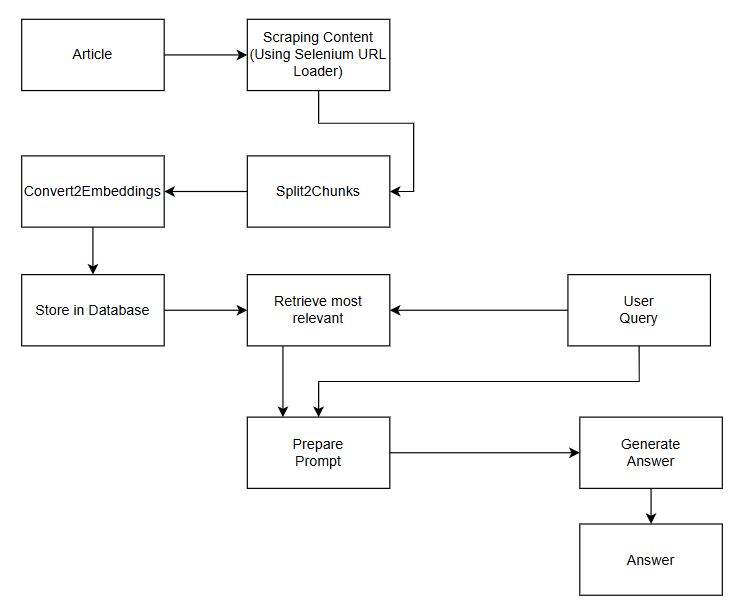

In [1]:
from IPython.display import Image
Image(filename='customer_support_qa_chatbot.JPG',width=800, height=400)

In [3]:
from langchain_openai.embeddings.base import OpenAIEmbeddings
from langchain_text_splitters.character import CharacterTextSplitter
#from langchain_openai import OpenAI
from langchain_openai import ChatOpenAI
#from langchain_community.llms import OpenAI
from langchain_community.document_loaders.url_selenium import SeleniumURLLoader
from langchain_core.prompts.prompt import PromptTemplate
from langchain_core.messages import HumanMessage
import os

In [4]:
ChatOpenAI.api_key=os.getenv("OPENAI_API_KEY2")

In [5]:
urls = ['https://beebom.com/what-is-nft-explained/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-download-gif-twitter/',
        'https://beebom.com/how-use-chatgpt-linux-terminal/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-save-instagram-story-with-music/',
        'https://beebom.com/how-install-pip-windows/',
        'https://beebom.com/how-check-disk-usage-linux/']

In [6]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
# use the selenium scraper to load the documents
loader = SeleniumURLLoader(urls=urls)
docs_not_splitted = loader.load()

# we split the documents into smaller chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(docs_not_splitted)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [7]:
docs[0]

Document(metadata={'source': 'https://beebom.com/what-is-nft-explained/', 'title': 'NFTs Explained: What is an NFT and What is Its Use | Beebom', 'description': 'Wondering what is non fungible token? We have explained NFTs, and tell you how you can buy, make and sell your own NFTs easily.', 'language': 'en-US'}, page_content='Home > Internet > NFTs Explained: What is an NFT and What is Its Use\n\nNFTs Explained: What is an NFT and What is Its Use\n\nArjun Sha\n\nComments\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t2\n\nShare\n\nCopied\n\nAfter Bitcoin and Blockchain, NFT is another word to have entered our lexicon. The buzzword is everywhere and people are wondering what is NFT and what is its use? Well, there is not really a one-line explainer. And that’s why we have brought a comprehensive explainer on NFT, what is its use in digital art, and more. So without wasting any time, let’s go ahead and learn about NFTs (Non-fungible Token) in complete detail.\n\nWhat is NFT: A Definitive

In [10]:
type(docs[0])

langchain_core.documents.base.Document

In [11]:
from langchain_community.vectorstores.faiss import FAISS
import os
os.environ["ALLOW_DANGEROUS_DESERIALIZATION"] = "true"
# Assuming `texts` is a list of chunks
texts_docs = docs

# Generate embeddings
embeddings = OpenAIEmbeddings()
faiss_index_docs = FAISS.from_documents(texts_docs, embeddings)

# Save FAISS index locally
faiss_index_docs.save_local("faiss_index_docs")

# Load FAISS index locally
new_faiss_index_docs = FAISS.load_local("faiss_index_docs", embeddings, allow_dangerous_deserialization=True)


In [12]:
# Step 2: Prepare the query
query = "How to check disk usage in Linux?"

# Step 3: Perform similarity search
results = faiss_index_docs.similarity_search(query, k=3)  # k is the number of results to return

# Display the results
for idx, doc in enumerate(results):
    print(f"Result {idx + 1}:")
    print(f"Content: {doc.page_content}")

Result 1:
Content: Home > Tech > How to Check Disk Usage in Linux (4 Methods)

How to Check Disk Usage in Linux (4 Methods)

Beebom Staff

Comments							
							
								0

Share

Copied

There may be times when you need to download some important files or transfer some photos to your Linux system, but face a problem of insufficient disk space. You head over to your file manager to delete the large files which you no longer require, but you have no clue which of them are occupying most of your disk space. In this article, we will show some easy methods to check disk usage in Linux from both the terminal and the GUI application.

Table of Contents

Display Disk Usage in Human Readable Format

Display Disk Occupancy of a Particular Type

Display Disk Usage in Human Readable Format

Display Disk Usage for a Particular Directory

Compare Disk Usage of Two Directories

Sorting Files based on File Size

Exclude Files Based on Their File Size

Exclude Files Based on their Types
Result 2:
Con

In [13]:
strings = [doc.page_content for doc in docs]

In [14]:
strings[:2]

['Home > Internet > NFTs Explained: What is an NFT and What is Its Use\n\nNFTs Explained: What is an NFT and What is Its Use\n\nArjun Sha\n\nComments\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t2\n\nShare\n\nCopied\n\nAfter Bitcoin and Blockchain, NFT is another word to have entered our lexicon. The buzzword is everywhere and people are wondering what is NFT and what is its use? Well, there is not really a one-line explainer. And that’s why we have brought a comprehensive explainer on NFT, what is its use in digital art, and more. So without wasting any time, let’s go ahead and learn about NFTs (Non-fungible Token) in complete detail.\n\nWhat is NFT: A Definitive Explainer (2021)\n\nHere, we have mentioned all the questions that people have in their minds regarding NFT. You can click on the table to find all the sections that we have covered in this article and click on the link to move to the corresponding section.\n\nTable of Contents\n\nNFTs Explained: What is NFT in Crypto?\n\nW

In [15]:
from langchain_community.vectorstores.faiss import FAISS
import os
os.environ["ALLOW_DANGEROUS_DESERIALIZATION"] = "true"
# Assuming `texts` is a list of chunks
texts = strings

# Generate embeddings
embeddings = OpenAIEmbeddings()
faiss_index = FAISS.from_texts(texts, embeddings)

# Save FAISS index locally
faiss_index.save_local("faiss_index")

# Load FAISS index locally
new_faiss_index = FAISS.load_local("faiss_index", embeddings, allow_dangerous_deserialization=True)


In [16]:
# Step 2: Prepare the query
query = "How to check disk usage in Linux?"

# Step 3: Perform the similarity search
results = faiss_index.similarity_search(query, k=3)  # k is the number of results to return

# Step 4: Display the results
for idx, doc in enumerate(results):
    print(f"Result {idx + 1}:")
    print(f"Content: {doc.page_content}")
    print(f"Metadata: {doc.metadata}")

Result 1:
Content: Home > Tech > How to Check Disk Usage in Linux (4 Methods)

How to Check Disk Usage in Linux (4 Methods)

Beebom Staff

Comments							
							
								0

Share

Copied

There may be times when you need to download some important files or transfer some photos to your Linux system, but face a problem of insufficient disk space. You head over to your file manager to delete the large files which you no longer require, but you have no clue which of them are occupying most of your disk space. In this article, we will show some easy methods to check disk usage in Linux from both the terminal and the GUI application.

Table of Contents

Display Disk Usage in Human Readable Format

Display Disk Occupancy of a Particular Type

Display Disk Usage in Human Readable Format

Display Disk Usage for a Particular Directory

Compare Disk Usage of Two Directories

Sorting Files based on File Size

Exclude Files Based on Their File Size

Exclude Files Based on their Types
Metadata: {}


In [17]:
template = """You are an exceptional customer support chatbot that gently answer questions.

You know the following context information.

{chunks_formatted}

Answer to the following question from a customer. Use only information from the previous context information. Do not invent stuff.

Question: {query}

Answer:"""

prompt = PromptTemplate(
    input_variables=["chunks_formatted", "query"],
    template=template,
)

In [18]:
query = "How to check disk usage in linux?"

# retrieve relevant chunks
results = faiss_index_docs.similarity_search(query, k=3)
retrieved_chunks = [doc.page_content for doc in docs]

# format the prompt
chunks_formatted = "\n\n".join(retrieved_chunks)
prompt_formatted = prompt.format(chunks_formatted=chunks_formatted, query=query)

# generate answer
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0, )
llm(prompt_formatted)

C:\Users\prave\AppData\Local\Temp\ipykernel_11384\915581275.py:13: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  llm(prompt_formatted)


BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 16385 tokens. However, your messages resulted in 20025 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [54]:
# Prepare the input as a chat message
messages = [HumanMessage(content=prompt_formatted)]

# Generate the answer
answer = llm(messages)

# Print the result
print(answer.content)
print(answer)

ValueError: Argument `prompt` is expected to be a string. Instead found <class 'langchain_core.messages.human.HumanMessage'>. If you want to run the LLM on multiple prompts, use `generate` instead.